In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pycaret.regression import *
from matplotlib import pyplot as plt
%matplotlib inline

# 1. Data Loading

In [14]:
train_df=pd.read_csv('./dataset/train.csv')
test_df=pd.read_csv('./dataset/test.csv')

In [15]:
train_df

,ID,electricity_kwh_per_month,natural_gas_therms_per_month,vehicle_miles_per_month,house_area_sqft,water_usage_liters_per_day,public_transport_usage_per_week,household_size,home_insulation_quality,meat_consumption_kg_per_week,laundry_loads_per_week,recycles_regularly,composts_organic_waste,uses_solar_panels,energy_efficient_appliances,heating_type,diet_type,owns_pet,smart_thermostat_installed,carbon_footprint
0,0xd6c,759.70,55.95,944.55,2422.07,541.27,1,3,2,4.23,9,1.0,0.0,0,1.0,gas,vegetarian,1,NaN,830.10
1,0x3fdf,387.06,70.59,1280.85,1995.3,280.39,1,2,1,3.27,8,0.0,0.0,0,0.0,electric,vegetarian,0,0.0,963.08
2,0x3b08,594.25,29.14,1005.72,2673.55,416.14,0,2,3,2.87,3,0.0,1.0,0,1.0,electric,omnivore,1,1.0,840.11
3,0x31e5,503.76,74.68,1049.46,2994.28,530.13,0,5,1,3.22,9,1.0,0.0,0,0.0,electric,omnivore,1,0.0,1252.42
4,0x397e,549.54,-77.00,756.49,2549.57,604.10,5,4,4,2.92,2,1.0,0.0,0,1.0,electric,vegetarian,0,1.0,580.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0x4aaa,324.96,43.37,438.36,1514.05,419.48,3,1,2,3.17,7,0.0,0.0,0,0.0,electric,omnivore,1,1.0,865.07
13996,0x36c3,581.19,83.50,1865.29,3357.9,651.11,0,1,3,6.60,3,1.0,1.0,0,0.0,gas,omnivore,1,0.0,1594.70
13997,0x3846,302.76,43.36,212.42,939.08,343.67,9,1,2,3.07,3,1.0,0.0,1,0.0,gas,omnivore,1,1.0,712.94
13998,0x4ba4,397.77,14.80,592.66,1164.04,271.67,2,7,0,2.48,4,1.0,0.0,1,0.0,gas,vegetarian,0,0.0,533.65


In [16]:
test_df

,ID,electricity_kwh_per_month,natural_gas_therms_per_month,vehicle_miles_per_month,house_area_sqft,water_usage_liters_per_day,public_transport_usage_per_week,household_size,home_insulation_quality,meat_consumption_kg_per_week,laundry_loads_per_week,recycles_regularly,composts_organic_waste,uses_solar_panels,energy_efficient_appliances,heating_type,diet_type,owns_pet,smart_thermostat_installed
0,0x42e7,309.73,58.89,984.73,f)0*7,332.68,3,5,3,1.86,2,0.0,0.0,0,1.0,gas,vegetarian,0,0.0
1,0x1950,278.49,48.47,841.76,1523.78,443.22,8,3,4,2.33,5,1.0,NaN,0,1.0,electric,omnivore,0,0.0
2,0x20e5,404.12,33.59,1219.33,1187.35,303.94,2,2,2,3.23,2,0.0,0.0,0,0.0,gas,omnivore,0,0.0
3,0x4378,324.74,41.93,562.96,647.43,496.58,2,1,3,4.01,7,0.0,1.0,1,1.0,electric,omnivore,1,0.0
4,0x1301,397.75,52.13,690.82,1576.17,346.56,0,5,4,2.23,6,1.0,0.0,0,0.0,none,omnivore,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0x1dde,422.80,56.70,428.54,1664.57,388.23,4,2,3,4.38,8,1.0,0.0,0,0.0,none,omnivore,1,0.0
5996,0x2c3b,423.90,58.47,906.81,2057.72,420.22,1,7,2,3.43,5,0.0,0.0,0,0.0,gas,omnivore,0,NaN
5997,0x4b6,440.94,44.60,1293.12,917.63,402.39,1,3,2,3.39,9,0.0,0.0,0,1.0,gas,omnivore,0,0.0
5998,0x4d5a,403.28,45.78,794.25,1784.37,495.33,2,wsnaV,1,2.39,2,1.0,0.0,0,NaN,electric,omnivore,1,0.0


In [17]:
train_df=train_df.drop(columns=['ID'])
test_df=test_df.drop(columns=['ID'])

# 2. Data Preprocessing & EDA

In [18]:
train_df.isna().sum()

electricity_kwh_per_month            0
natural_gas_therms_per_month         0
vehicle_miles_per_month              0
house_area_sqft                      0
water_usage_liters_per_day           0
public_transport_usage_per_week      0
household_size                       0
home_insulation_quality              0
meat_consumption_kg_per_week         0
laundry_loads_per_week               0
recycles_regularly                 410
composts_organic_waste             390
uses_solar_panels                    0
energy_efficient_appliances        431
heating_type                         0
diet_type                            0
owns_pet                             0
smart_thermostat_installed         416
carbon_footprint                     0
dtype: int64

In [19]:
test_df.isna().sum()

electricity_kwh_per_month            0
natural_gas_therms_per_month         0
vehicle_miles_per_month              0
house_area_sqft                      0
water_usage_liters_per_day           0
public_transport_usage_per_week      0
household_size                       0
home_insulation_quality              0
meat_consumption_kg_per_week         0
laundry_loads_per_week               0
recycles_regularly                 179
composts_organic_waste             200
uses_solar_panels                    0
energy_efficient_appliances        162
heating_type                         0
diet_type                            0
owns_pet                             0
smart_thermostat_installed         174
dtype: int64

In [20]:
# For training data
train_df['recycles_regularly'] = train_df['recycles_regularly'].fillna(train_df['recycles_regularly'].mode()[0])
train_df['composts_organic_waste'] = train_df['composts_organic_waste'].fillna(train_df['composts_organic_waste'].mode()[0])
train_df['smart_thermostat_installed'] = train_df['smart_thermostat_installed'].fillna(train_df['smart_thermostat_installed'].mode()[0])
train_df['energy_efficient_appliances'] = train_df['energy_efficient_appliances'].fillna(train_df['energy_efficient_appliances'].mode()[0])

# For test data
test_df['recycles_regularly'] = test_df['recycles_regularly'].fillna(test_df['recycles_regularly'].mode()[0])
test_df['composts_organic_waste'] = test_df['composts_organic_waste'].fillna(test_df['composts_organic_waste'].mode()[0])
test_df['smart_thermostat_installed'] = test_df['smart_thermostat_installed'].fillna(test_df['smart_thermostat_installed'].mode()[0])
test_df['energy_efficient_appliances'] = test_df['energy_efficient_appliances'].fillna(test_df['energy_efficient_appliances'].mode()[0])

In [21]:
# For training data
train_df['diet_type'] = train_df['diet_type'].astype('category')
train_df['diet_type'] = train_df['diet_type'].cat.codes
train_df['heating_type'] = train_df['heating_type'].apply(lambda x: x if x in ['gas', 'electric'] else 'unknown')
train_df['heating_type'] = train_df['heating_type'].astype('category')
train_df['heating_type'] = train_df['heating_type'].cat.codes

# For test data
test_df['diet_type'] = test_df['diet_type'].astype('category')
test_df['diet_type'] = test_df['diet_type'].cat.codes
test_df['heating_type'] = test_df['heating_type'].apply(lambda x: x if x in ['gas', 'electric'] else 'unknown')
test_df['heating_type'] = test_df['heating_type'].astype('category')
test_df['heating_type'] = test_df['heating_type'].cat.codes

In [22]:
# For training data
train_df['house_area_sqft'] = (
    train_df['house_area_sqft']
    .replace(r'[^0-9.]', '', regex=True)  
    .replace(r'^\.+$', '', regex=True)   
    .replace('', None)                   
)
train_df['household_size'] = train_df['household_size'].apply(lambda x: x if str(x).isdigit() else np.nan)
household_mode = train_df['household_size'].mode()[0]
train_df['household_size'] = train_df['household_size'].fillna(household_mode)
train_df['household_size'] = train_df['household_size'].astype('category')
train_df['household_size'] = train_df['household_size'].cat.codes
train_df['house_area_sqft'] = pd.to_numeric(train_df['house_area_sqft'], errors='coerce')
house_area_mean = train_df['house_area_sqft'].mean()
train_df['house_area_sqft'] = train_df['house_area_sqft'].fillna(house_area_mean)

# For test data
test_df['house_area_sqft'] = (
    test_df['house_area_sqft']
    .replace(r'[^0-9.]', '', regex=True)  
    .replace(r'^\.+$', '', regex=True)   
    .replace('', None)                   
)
test_df['household_size'] = test_df['household_size'].apply(lambda x: x if str(x).isdigit() else np.nan)
test_df['household_size'] = test_df['household_size'].fillna(household_mode)
test_df['household_size'] = test_df['household_size'].astype('category')
test_df['household_size'] = test_df['household_size'].cat.codes
test_df['house_area_sqft'] = pd.to_numeric(test_df['house_area_sqft'], errors='coerce')
test_df['house_area_sqft'] = test_df['house_area_sqft'].fillna(house_area_mean)

In [23]:
# Check for negative values in training data
negative_columns_train = train_df.columns[(train_df < 0).any()]
print("Training data - Columns with negative values:", negative_columns_train.tolist())

# Check for negative values in test data
negative_columns_test = test_df.columns[(test_df < 0).any()]
print("Test data - Columns with negative values:", negative_columns_test.tolist())

Training data - Columns with negative values: ['electricity_kwh_per_month', 'natural_gas_therms_per_month', 'vehicle_miles_per_month', 'water_usage_liters_per_day', 'public_transport_usage_per_week', 'home_insulation_quality']
Test data - Columns with negative values: ['electricity_kwh_per_month', 'natural_gas_therms_per_month', 'vehicle_miles_per_month', 'water_usage_liters_per_day', 'public_transport_usage_per_week', 'home_insulation_quality']


In [24]:
columns_to_clean = ['electricity_kwh_per_month', 'natural_gas_therms_per_month',
                    'vehicle_miles_per_month', 'water_usage_liters_per_day',
                    'public_transport_usage_per_week', 'home_insulation_quality']

# For training data
for col in columns_to_clean:
    train_df[col] = train_df[col].apply(lambda x: np.nan if x < 0 else x)

# Store median values from training data
median_values = {}
for col in columns_to_clean:
    median_values[col] = train_df[col].median()
    train_df[col] = train_df[col].fillna(median_values[col])

# For test data
for col in columns_to_clean:
    test_df[col] = test_df[col].apply(lambda x: np.nan if x < 0 else x)

for col in columns_to_clean:
    test_df[col] = test_df[col].fillna(median_values[col])

In [25]:
train_df.head()

,electricity_kwh_per_month,natural_gas_therms_per_month,vehicle_miles_per_month,house_area_sqft,water_usage_liters_per_day,public_transport_usage_per_week,household_size,home_insulation_quality,meat_consumption_kg_per_week,laundry_loads_per_week,recycles_regularly,composts_organic_waste,uses_solar_panels,energy_efficient_appliances,heating_type,diet_type,owns_pet,smart_thermostat_installed,carbon_footprint
0,759.70,55.95,944.55,2422.07,541.27,1.0,3,2.0,4.23,9,1.0,0.0,0,1.0,1,2,1,0.0,830.10
1,387.06,70.59,1280.85,1995.30,280.39,1.0,2,1.0,3.27,8,0.0,0.0,0,0.0,0,2,0,0.0,963.08
2,594.25,29.14,1005.72,2673.55,416.14,0.0,2,3.0,2.87,3,0.0,1.0,0,1.0,0,0,1,1.0,840.11
3,503.76,74.68,1049.46,2994.28,530.13,0.0,5,1.0,3.22,9,1.0,0.0,0,0.0,0,0,1,0.0,1252.42
4,549.54,49.72,756.49,2549.57,604.10,5.0,4,4.0,2.92,2,1.0,0.0,0,1.0,0,2,0,1.0,580.74


In [26]:
scale_cols = [
    'electricity_kwh_per_month',
    'natural_gas_therms_per_month',
    'vehicle_miles_per_month',
    'house_area_sqft',
    'water_usage_liters_per_day',
    'meat_consumption_kg_per_week',
    'laundry_loads_per_week'
]

# Fit scaler on training data and transform both datasets
scaler = StandardScaler()
train_df[scale_cols] = scaler.fit_transform(train_df[scale_cols])
test_df[scale_cols] = scaler.transform(test_df[scale_cols])

# 3. Model Training 

In [27]:
X = train_df.drop('carbon_footprint', axis=1)
y = train_df['carbon_footprint']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
data = train_df.copy()

regression_setup = setup(data=data, target='carbon_footprint', session_id=42, 
                         normalize=True,  verbose=False)

In [29]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,32.7705,4415.4690,66.2309,0.8772,0.0864,0.0442,0.1730
gbr,Gradient Boosting Regressor,37.9566,4824.0323,69.2907,0.8658,0.0899,0.0507,0.3350
et,Extra Trees Regressor,42.3381,5365.8003,73.1176,0.8509,0.0963,0.0575,0.5620
rf,Random Forest Regressor,46.7666,5812.1412,76.1096,0.8385,0.0993,0.0628,1.0570
lr,Linear Regression,64.3415,10236.6878,101.0702,0.7157,0.1438,0.0950,0.5000
ridge,Ridge Regression,64.3419,10236.6841,101.0702,0.7157,0.1438,0.0950,0.0110
lar,Least Angle Regression,64.3415,10236.6878,101.0702,0.7157,0.1438,0.0950,0.0100
br,Bayesian Ridge,64.3448,10236.6873,101.0703,0.7157,0.1438,0.0950,0.0140
llar,Lasso Least Angle Regression,64.6330,10244.3994,101.1139,0.7155,0.1433,0.0950,0.0110
lasso,Lasso Regression,64.6330,10244.3988,101.1139,0.7155,0.1433,0.0950,0.2170


# 4. Evaluation

In [ ]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

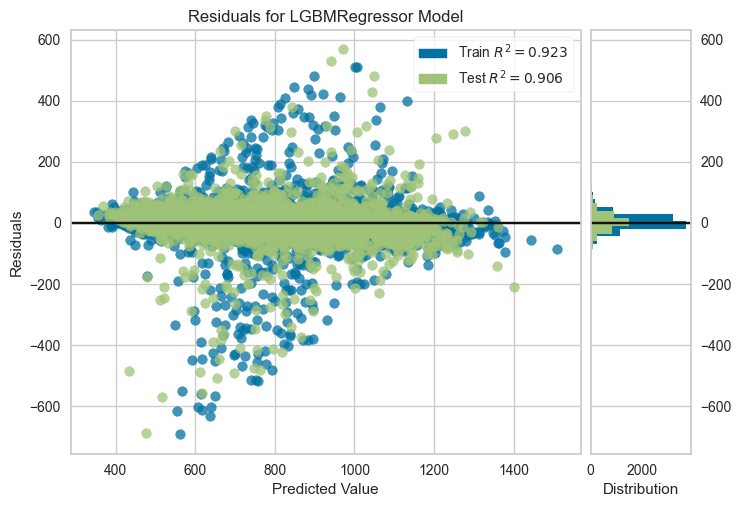

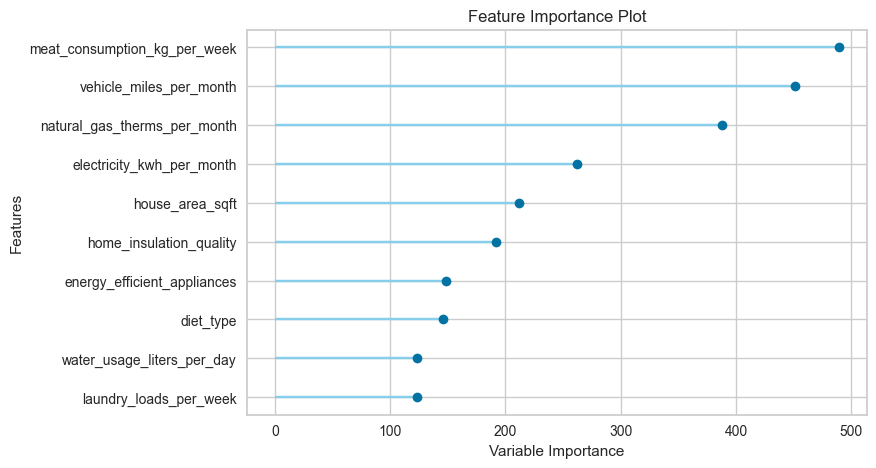

In [41]:
plot_model(best_model, plot = 'residuals')
plot_model(best_model, plot = 'feature')

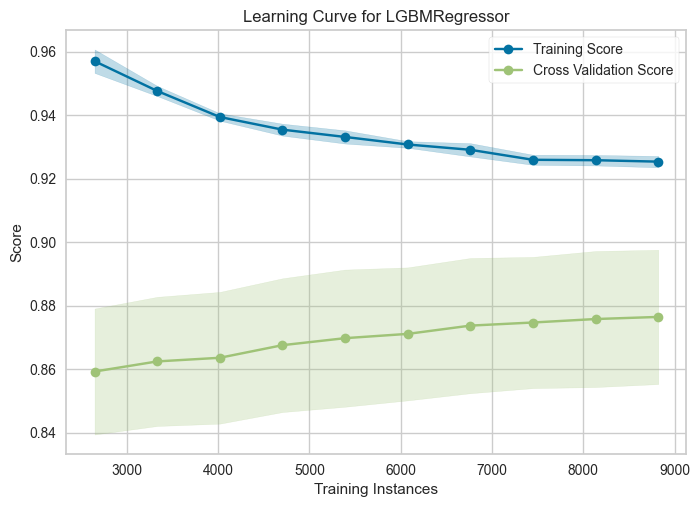

In [45]:
plot_model(best_model,'learning')

In [30]:
# Finalize the best model (this trains it on the full training dataset)
final_model = finalize_model(best_model)

# Make predictions on test data
predictions = predict_model(final_model, data=test_df)
prediction_values = predictions['prediction_label']  

# 5. Submission

In [31]:
# Create submission file
test=pd.read_csv('./dataset/test.csv')
submission = pd.DataFrame({
    'ID': test['ID'], 
    'carbon_footprint': prediction_values  
})

submission.to_csv('submission.csv', index=False)

In [43]:
save_model(best_model, 'CF')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['electricity_kwh_per_month',
                                              'natural_gas_therms_per_month',
                                              'vehicle_miles_per_month',
                                              'house_area_sqft',
                                              'water_usage_liters_per_day',
                                              'public_transport_usage_per_week',
                                              'household_size',
                                              'home_insulation_quality',
                                              'meat_consumption_kg_per_week',
                                              'laundry_loads_p...
                                              'energy_efficient_appliances',
                                              'heating_type', 'diet_type',
                                        